In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
df = pd.read_csv("Clean_data.csv")
# df.columns.tolist()
df.size

1060000

## 1. Plot the department score distribution

In [56]:
df1 = df[['department_name','star_rating','student_star']]
df1 = df1.sort_values(by='department_name')
df1['department_name'] = df1['department_name'].apply(lambda x: x[:-len('department')])
df1.head()

,department_name,star_rating,student_star
63,ASL & Deaf Studies,4.2,2.5
64,ASL & Deaf Studies,4.2,5.0
62,ASL & Deaf Studies,4.2,5.0
61,ASL & Deaf Studies,4.2,2.0
60,ASL & Deaf Studies,4.2,5.0


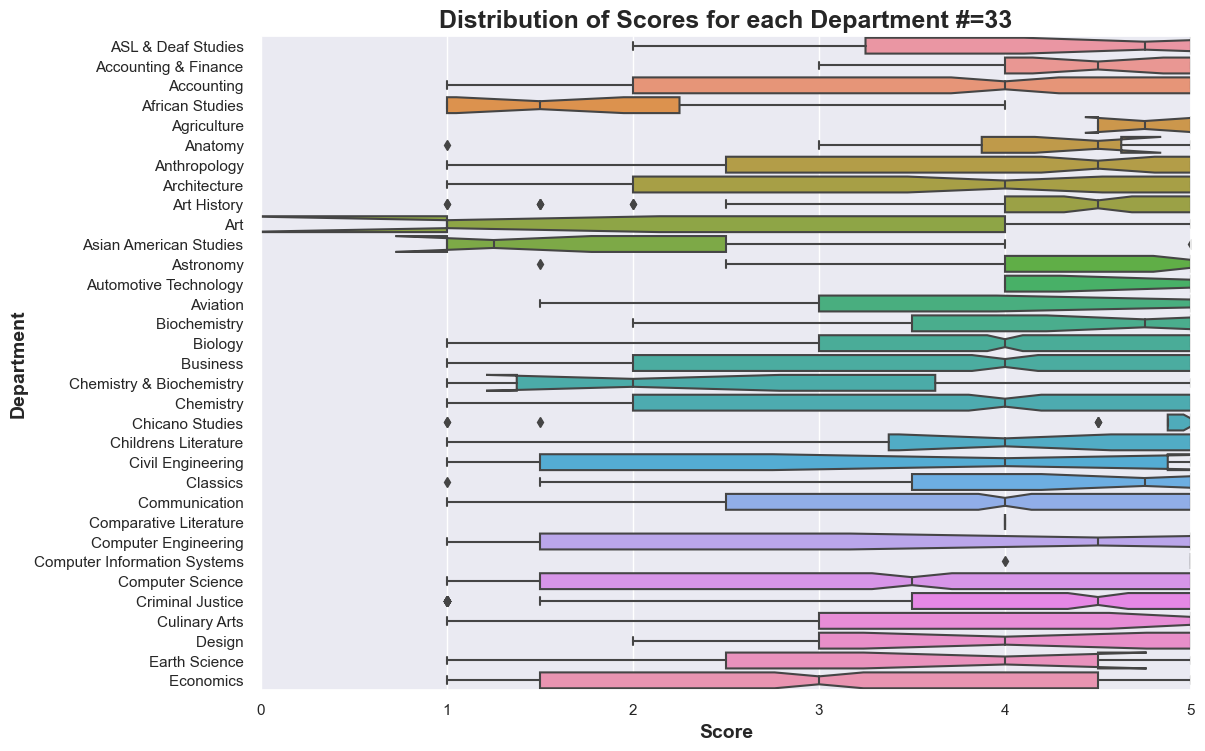

In [63]:
'''
PROBLEM to discuss: it's too much to plot all departments in one plot, shall we choose some departments but not all?
'''

all_department_name = df1.department_name.unique().tolist()
name_setrange = all_department_name[33]
df_p1 = df1[df1['department_name'] < name_setrange]
sns.set(rc={'figure.figsize':(12,8.5)})
sns.boxplot(x='student_star',y='department_name',data=df_p1,notch=True,orient='h')
plt.xlabel('Score',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(df.year.unique()))
plt.ylabel('Department',fontsize=14,fontweight="bold")
plt.title('Distribution of Scores for each Department #=33',fontsize=18,fontweight="bold")
plt.xlim(0,5)
plt.show()

## 2. Find every top and end 5 for each category (school, prof, department)

In [95]:
'''
Problem to discuss: There is no huge difference between the school and prof ratings, would be a lot of
                    score 5 and score 1. Shall we only keep this part for department?
'''
df2_school = df[['school_name','star_rating']]
df2_school = df2_school.groupby('school_name').mean().reset_index()
df2_school = df2_school.sort_values(by='star_rating', ascending=False)
list_schoolRanking = df2_school.school_name.tolist()
# print(list_schoolRanking)
df2_school

,school_name,star_rating
286,Northern Virginia Community College (all campu...,5.0
228,Maryland Institute College of Art,5.0
324,Post University,5.0
105,Dakota Wesleyan University,5.0
80,Clemson University,5.0
...,...,...
218,Long Island University,1.5
340,Roger Williams University,1.4
279,North Idaho College,1.3
39,Brookhaven College,1.3


In [92]:
'''
Pretty interesting: among end 5 there are 3 cultural study department
'''

df2_depar = df[['department_name','star_rating']]
df2_depar = df2_depar.groupby('department_name').mean().reset_index()
df2_depar = df2_depar.sort_values(by='star_rating', ascending=False)
list_deparRanking = df2_depar.department_name.tolist()
print("ECE department ranking:",list_deparRanking.index('Electrical Engineering department'))
df2_depar

ECE department ranking: 69


,department_name,star_rating
42,Family & Consumer Science department,5.0
56,Interaction Design & Art department,5.0
36,Elementary Education department,5.0
60,Kinesiology department,4.8
4,Agriculture department,4.8
...,...,...
10,Asian American Studies department,2.3
74,Natural Sciences department,2.1
63,Library Science department,1.9
58,Italian department,1.8


## 8. Ratings change along the year

In [109]:
df8 = df[['star_rating','post_date']]
df8['year'] = pd.DatetimeIndex(df8['post_date']).year
df8 = df8.sort_values(by='year', ascending=False)
df8 = df8.groupby('year').mean().reset_index()
# df8

/var/folders/p5/ds3m1wg57f34v7pk5fq5kkyr0000gn/T/ipykernel_9035/129843591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['year'] = pd.DatetimeIndex(df8['post_date']).year


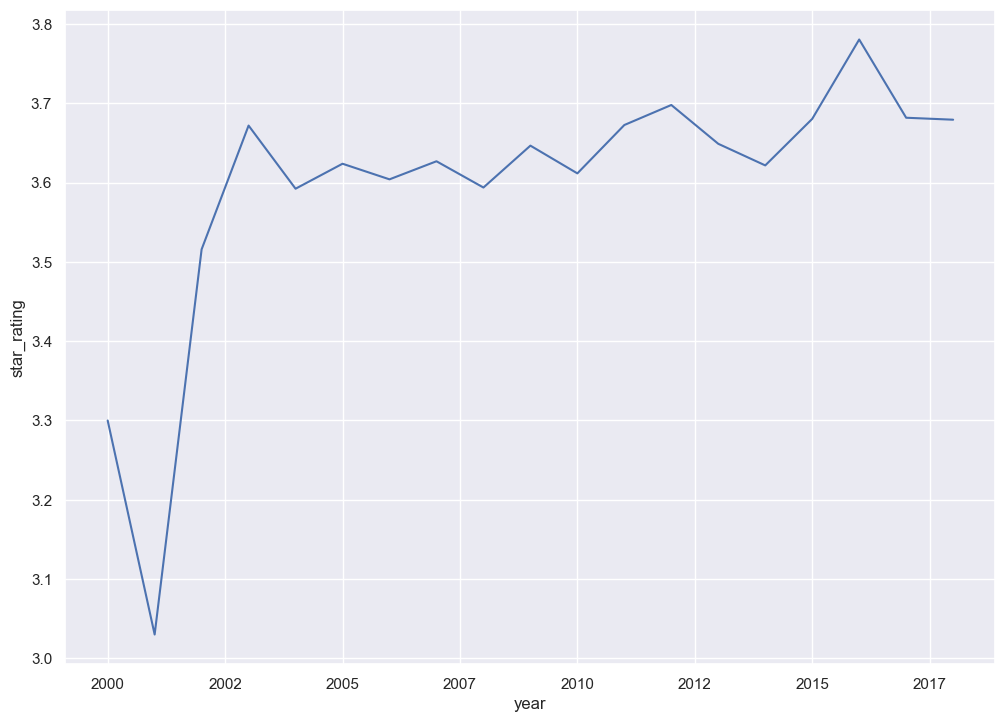

In [108]:
'''
Problem to discuss: There is a little change after a huge increase in 2022
'''
# sns.lineplot(data=df8, x="year", y="star_rating")
ax = sns.lineplot(x='year', y='star_rating', data=df8)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

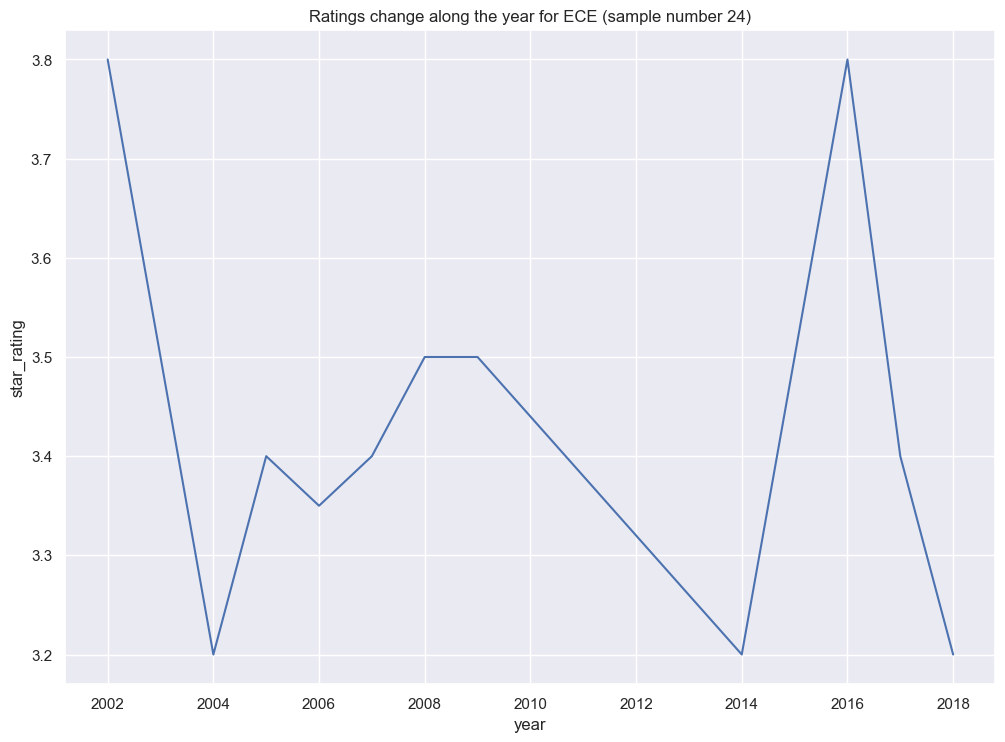

In [125]:
'''
So I also plot the graph for ECE and CSE department
'''
df8_ECE = df[['department_name','star_rating','post_date']]
df8_ECE = df8_ECE[df8_ECE['department_name']=='Electrical Engineering department']
df8_ECE['year'] = pd.DatetimeIndex(df8_ECE['post_date']).year
df8_ECE = df8_ECE.sort_values(by='year', ascending=False)
df8_ECE = df8_ECE.groupby('year').mean().reset_index()

a = str(int(df8_ECE.size))
title1 = 'Ratings change along the year for ECE (sample number '+ a + ')'
ax = sns.lineplot(x='year', y='star_rating', data=df8_ECE).set(title=title1)
plt.show()

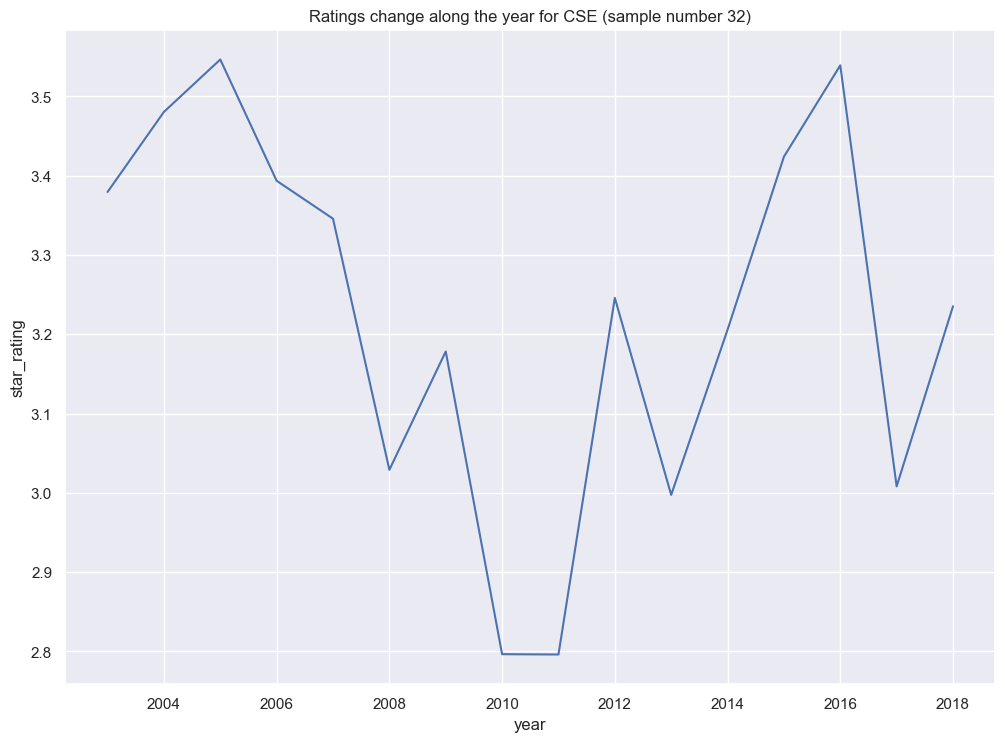

In [129]:
df8_CSE = df[['department_name','star_rating','post_date']]
df8_CSE = df8_CSE[df8_CSE['department_name']=='Computer Science department']
df8_CSE['year'] = pd.DatetimeIndex(df8_CSE['post_date']).year
df8_CSE = df8_CSE.sort_values(by='year', ascending=False)
df8_CSE = df8_CSE.groupby('year').mean().reset_index()

a = str(int(df8_CSE.size))
title1 = 'Ratings change along the year for CSE (sample number '+ a + ')'
ax = sns.lineplot(x='year', y='star_rating', data=df8_CSE).set(title=title1)
plt.show()